# $Q_{MSE}(\alpha, X^l)=\frac{1}{l}\sum^l_{i=1}(a-y_i)^2\rightarrow min_a \Rightarrow a*_{MSE} = \frac{1}{l} \sum^l_{i=1}y_i=\overline y$
# $Q_{MAE}(\alpha, X^l)=\frac{1}{l}\sum^l_{i=1}|a-y_i| \rightarrow min_a \Rightarrow a*_{MAE}=median{y_i}^l_{i=1}$

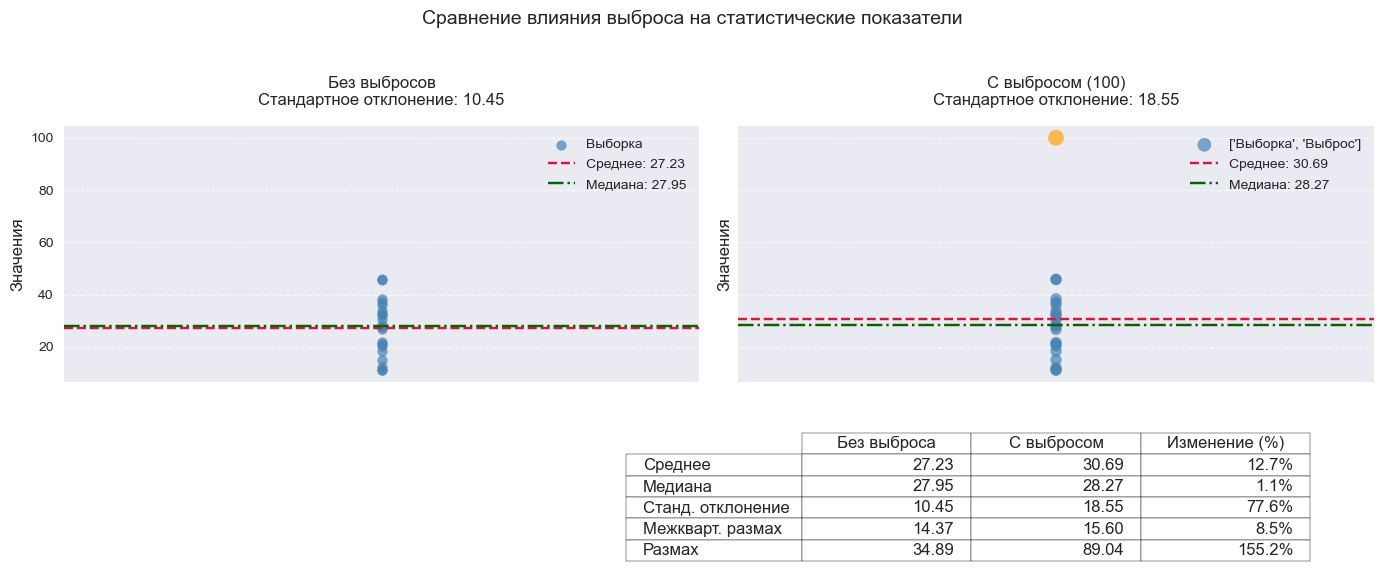

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Настройки для воспроизводимости и стиля
np.random.seed(3)
plt.style.use('seaborn-v0_8')
plt.rcParams['font.size'] = 12

# Генерация данных
y_min, y_max = 10, 50
num_points = 20
sample = np.random.uniform(y_min, y_max, num_points)
vibros = 100
sample_with_outlier = np.append(sample, vibros)

# Расчет статистик
def calculate_stats(data):
    return {
        'mean': np.mean(data),
        'median': np.median(data),
        'std': np.std(data),
        'iqr': stats.iqr(data),
        'range': np.ptp(data)
    }

stats_clean = calculate_stats(sample)
stats_outlier = calculate_stats(sample_with_outlier)

# Создание графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# График без выброса
ax1.scatter([1]*len(sample), sample, color='steelblue', alpha=0.7, label="Выборка")
ax1.axhline(stats_clean['mean'], color='crimson', linestyle='--', 
            label=f'Среднее: {stats_clean["mean"]:.2f}')
ax1.axhline(stats_clean['median'], color='darkgreen', linestyle='-.', 
            label=f'Медиана: {stats_clean["median"]:.2f}')
ax1.set_title(f"Без выбросов\nСтандартное отклонение: {stats_clean['std']:.2f}", pad=15)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

# График с выбросом
outlier_idx = len(sample_with_outlier) - 1
colors = ['steelblue']*len(sample) + ['orange']
sizes = [60]*len(sample) + [120]

ax2.scatter([1]*len(sample_with_outlier), sample_with_outlier, 
           c=colors, s=sizes, alpha=0.7, 
           label=["Выборка", "Выброс"])
ax2.axhline(stats_outlier['mean'], color='crimson', linestyle='--', 
           label=f'Среднее: {stats_outlier["mean"]:.2f}')
ax2.axhline(stats_outlier['median'], color='darkgreen', linestyle='-.', 
           label=f'Медиана: {stats_outlier["median"]:.2f}')
ax2.set_title(f"С выбросом ({vibros})\nСтандартное отклонение: {stats_outlier['std']:.2f}", pad=15)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

# Общие настройки
for ax in (ax1, ax2):
    ax.set_xlim(0.8, 1.2)
    ax.set_xticks([])
    ax.set_ylabel('Значения', fontsize=12)

fig.suptitle('Сравнение влияния выброса на статистические показатели', 
             fontsize=14, y=1.02)
plt.tight_layout()

# Дополнительная информация в таблице
stats_table = plt.table(cellText=[
    [f"{stats_clean['mean']:.2f}", f"{stats_outlier['mean']:.2f}", 
     f"{(stats_outlier['mean']-stats_clean['mean'])/stats_clean['mean']*100:.1f}%"],
    [f"{stats_clean['median']:.2f}", f"{stats_outlier['median']:.2f}", 
     f"{(stats_outlier['median']-stats_clean['median'])/stats_clean['median']*100:.1f}%"],
    [f"{stats_clean['std']:.2f}", f"{stats_outlier['std']:.2f}", 
     f"{(stats_outlier['std']-stats_clean['std'])/stats_clean['std']*100:.1f}%"],
    [f"{stats_clean['iqr']:.2f}", f"{stats_outlier['iqr']:.2f}", 
     f"{(stats_outlier['iqr']-stats_clean['iqr'])/stats_clean['iqr']*100:.1f}%"],
    [f"{stats_clean['range']:.2f}", f"{stats_outlier['range']:.2f}", 
     f"{(stats_outlier['range']-stats_clean['range'])/stats_clean['range']*100:.1f}%"]
],
colLabels=['Без выброса', 'С выбросом', 'Изменение (%)'],
rowLabels=['Среднее', 'Медиана', 'Станд. отклонение', 
          'Межкварт. размах', 'Размах'],
loc='bottom', bbox=[0.1, -0.7, 0.8, 0.5])

plt.subplots_adjust(bottom=0.4)
plt.show()